In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np 
import tiktoken

## Read Data

In [8]:
cmap = mpl.cm.get_cmap('coolwarm')
unusable_columns = ['Use-cases','Categories', 'S No']
df = pd.read_excel('src/data/extra/Turn 1 (HF).xlsx').drop(unusable_columns, axis=1)
target_col = 'Type'
text_column = 'Prompts'

C:\Users\root\AppData\Local\Temp\ipykernel_30448\3916115723.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap('coolwarm')


In [9]:
def num_tokens_from_string(string: str, encoding_name: str='cl100k_base') -> int:
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

**Plot Target Distribution & Text Length**

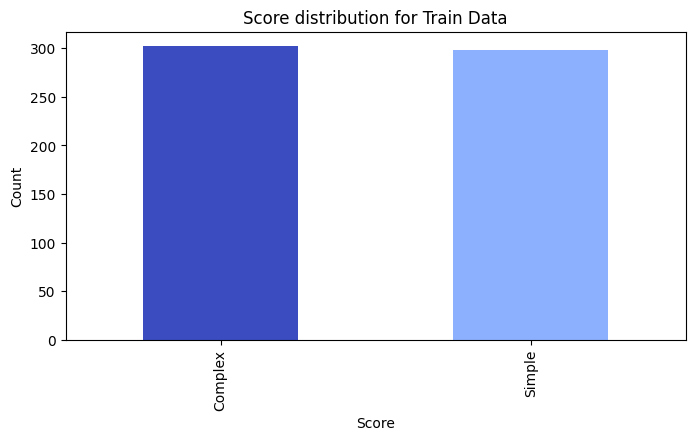

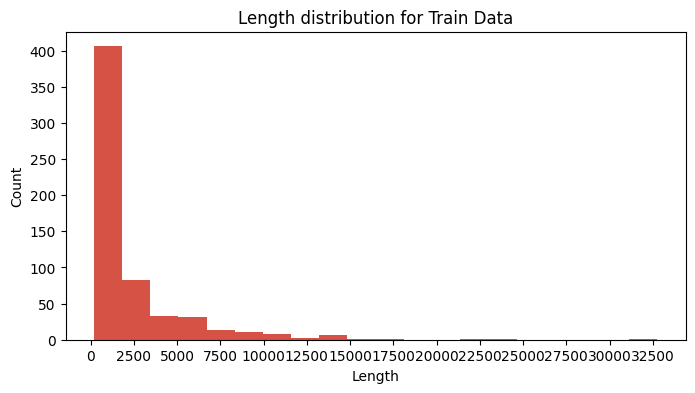

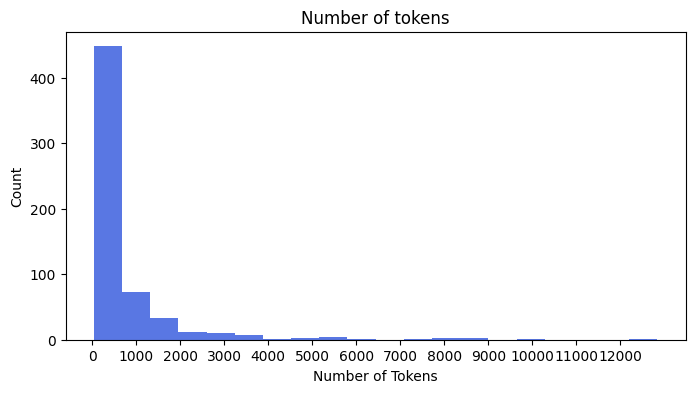

In [10]:


# Show distribution of answers using a bar plot
plt.figure(figsize=(8, 4))
df.Type.value_counts().plot.bar(color=[cmap(0.0), cmap(0.25)])
plt.xlabel("Score")
plt.ylabel("Count")
plt.title("Score distribution for Train Data")
plt.show()

# Show distribution of essay length using a bar plot
plt.figure(figsize=(8, 4))
df['length'] = df[text_column].map(len)
df.length.plot.hist(logy=False, color=cmap(0.9), bins=20)
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Length distribution for Train Data")
plt.xticks(np.arange(0, df['length'].max() + 1, step=2500))  # Adjust step as needed
plt.show()


plt.figure(figsize=(8, 4))
df['num_tokens'] = df[text_column].map(num_tokens_from_string)
df.num_tokens.plot.hist(logy=False, color=cmap(0.1), bins=20)
plt.xlabel("Number of Tokens")
plt.ylabel("Count")
plt.title("Number of tokens")
plt.xticks(np.arange(0, df['num_tokens'].max() + 1, step=1000))  # Adjust step as needed
plt.show()


In [11]:
print(f'Length is bound between {df["length"].min()} and {df["length"].max()}')
print(f'Num_tokens is bound between {df["num_tokens"].min()} and {df["num_tokens"].max()}')

Length is bound between 188 and 32767
Num_tokens is bound between 37 and 12845


Average Number of Tokens & Length per label

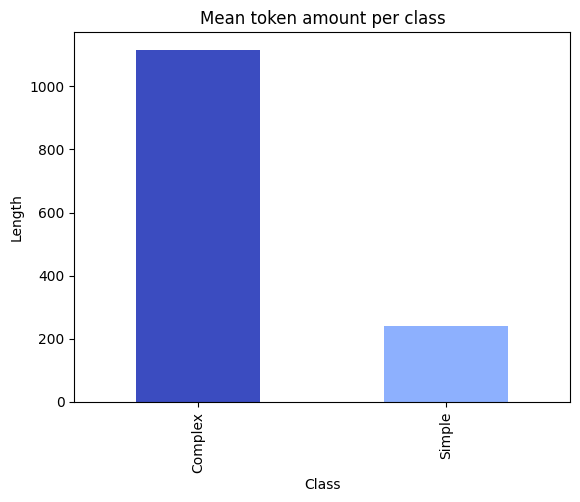

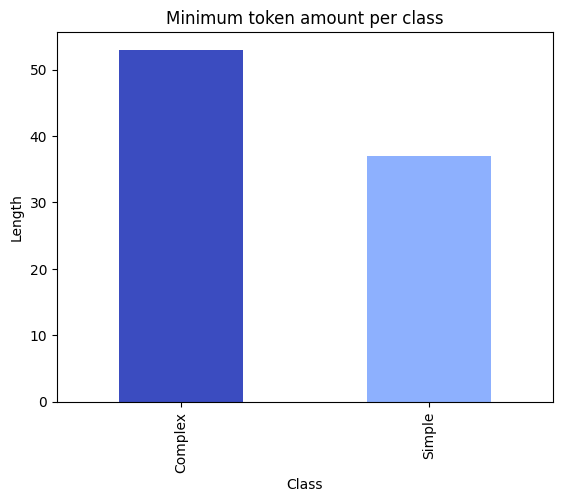

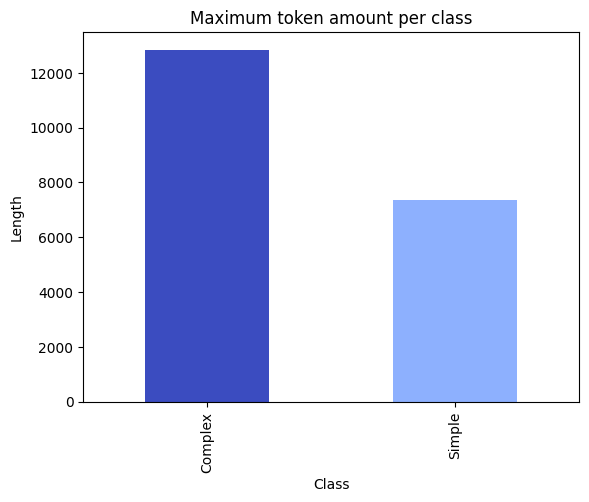

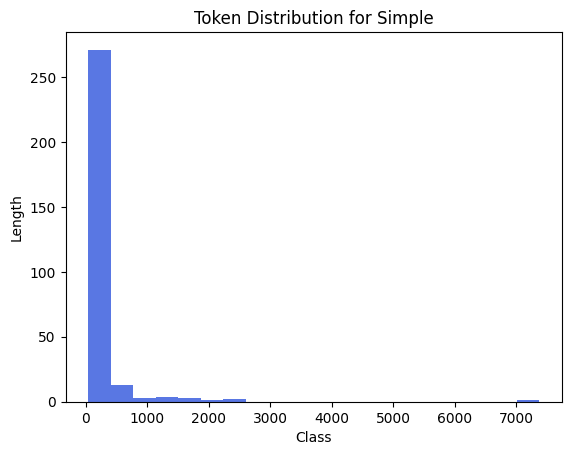

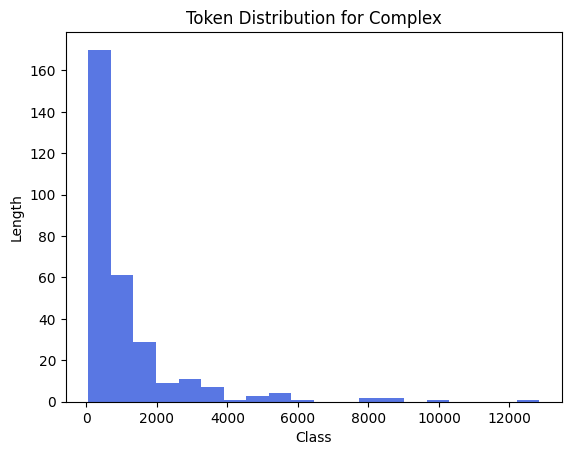

In [22]:
df.groupby(target_col)['num_tokens'].mean().plot.bar(color=[cmap(0.0), cmap(0.25)])
plt.xlabel("Class")
plt.ylabel("Length")
plt.title("Mean token amount per class")
plt.show()

df.groupby(target_col)['num_tokens'].min().plot.bar(color=[cmap(0.0), cmap(0.25)])
plt.xlabel("Class")
plt.ylabel("Length")
plt.title("Minimum token amount per class")
plt.show()

df.groupby(target_col)['num_tokens'].max().plot.bar(color=[cmap(0.0), cmap(0.25)])
plt.xlabel("Class")
plt.ylabel("Length")
plt.title("Maximum token amount per class")
plt.show()

classes = df[target_col].unique()

for target_class in classes:
    df.loc[df[target_col]==target_class]['num_tokens'].plot.hist(logy=False, color=cmap(0.1), bins=20)
    plt.xlabel("Class")
    plt.ylabel("Length")
    plt.title(f"Token Distribution for {target_class}")
    plt.show()
#df.groupby(target_col)['length'].mean().plot.bar(color=[cmap(0.0), cmap(0.25)])
#plt.xlabel("Class")
#plt.ylabel("Length")
#plt.title("Mean Lengths per class")
#plt.show()

#df.groupby(target_col)['length'].min().plot.bar(color=[cmap(0.0), cmap(0.25)])
#plt.xlabel("Class")
#plt.ylabel("Length")
#plt.title("Minimum Lengths per class")
#plt.show()
#
#df.groupby(target_col)['length'].max().plot.bar(color=[cmap(0.0), cmap(0.25)])
#plt.xlabel("Class")
#plt.ylabel("Length")
#plt.title("Maximum Lengths per class")
#plt.show()

